| Фильтр             | Принцип работы                                                                 | Преимущества                                                                 | Недостатки                                                                 | Когда использовать?                                                                 |
|--------------------|--------------------------------------------------------------------------------|------------------------------------------------------------------------------|----------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| **Медианный фильтр** | Заменяет значение пикселя медианой значений в его окрестности.                  | - Эффективен против импульсного шума ("соль и перец").<br>- Сохраняет резкие границы. | - Может искажать текстуры.<br>- Неэффективен для гауссовского шума.        | Когда нужно удалить импульсный шум без размытия границ (например, медицинские изображения). |
| **Фильтр Гаусса**   | Использует ядро с гауссовским распределением весов для сглаживания.             | - Эффективен против гауссовского шума.<br>- Плавное сглаживание.             | - Размывает мелкие детали и границы.                                       | Когда нужно сгладить шум с сохранением общего вида изображения (предобработка для детекции). |
| **Билатеральный фильтр** | Учитывает как пространственную близость, так и разницу интенсивностей пикселей. | - Сохраняет границы и детали.<br>- Эффективен для сложных текстур.           | - Вычислительно затратен.<br>- Медленный для больших изображений.           | Когда важно сохранить резкие границы и текстуры (например, обработка портретов).    |

1.  Сравните  и  противопоставьте  использование  медианного  фильтра,  фильтра 
Гаусса,  и  билатерального  фильтра  в  контексте  обработки  изображений.  Как 
каждый  из  этих  фильтров  работает  для  подавления  шума  и  сглаживания 
изображений, и в каких случаях один фильтр может быть предпочтительнее 
другого? 
2.  Напишите код на Python, который динамически создаёт и обучает многослойную 
нейронную сеть с использованием заданного числа скрытых слоёв и нейронов в 
каждом слое.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Точность на тестовых данных: {accuracy:.2f}")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5393 - loss: 0.6914 - val_accuracy: 0.7100 - val_loss: 0.5914
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7836 - loss: 0.5495 - val_accuracy: 0.8450 - val_loss: 0.4938
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8566 - loss: 0.4306 - val_accuracy: 0.8550 - val_loss: 0.4182
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8886 - loss: 0.3499 - val_accuracy: 0.8650 - val_loss: 0.3774
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8927 - loss: 0.2993 - val_accuracy: 0.8550 - val_loss: 0.3604
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8714 - loss: 0.3103 - val_accuracy: 0.8600 - val_loss: 0.3573
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8897 - loss: 0.2972 - val_accuracy: 0.8700 - val_loss: 0.3487
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8985 - loss: 0.2668 - val_accuracy: 0.8600 - val_loss:

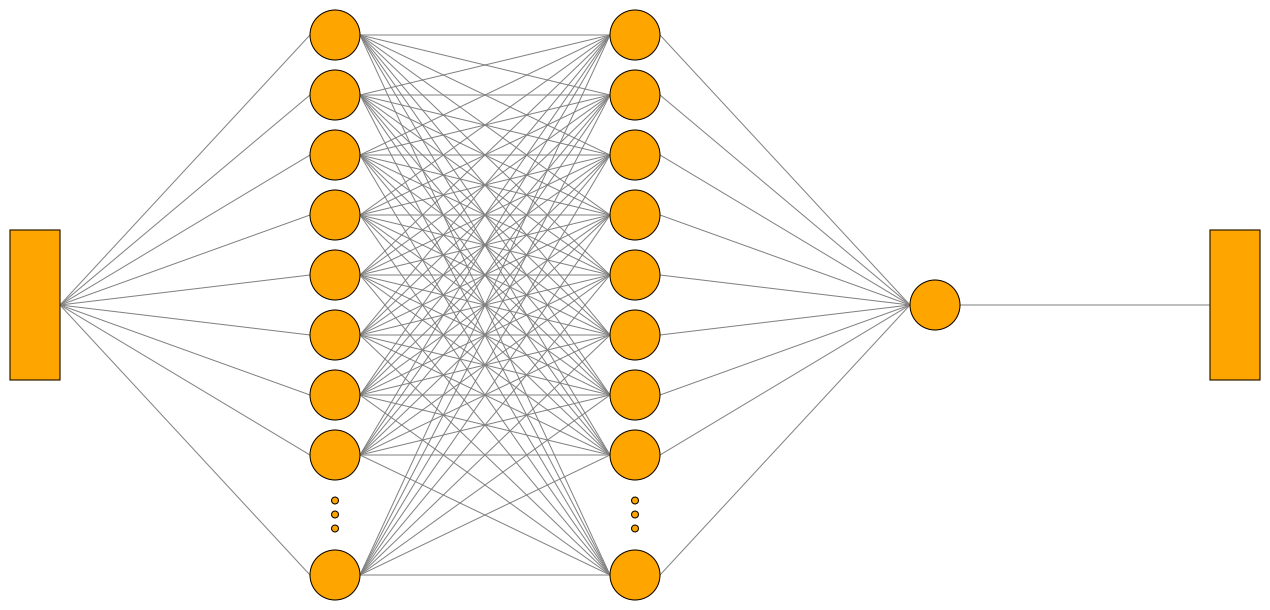

In [14]:
import visualkeras

visualkeras.graph_view(model)

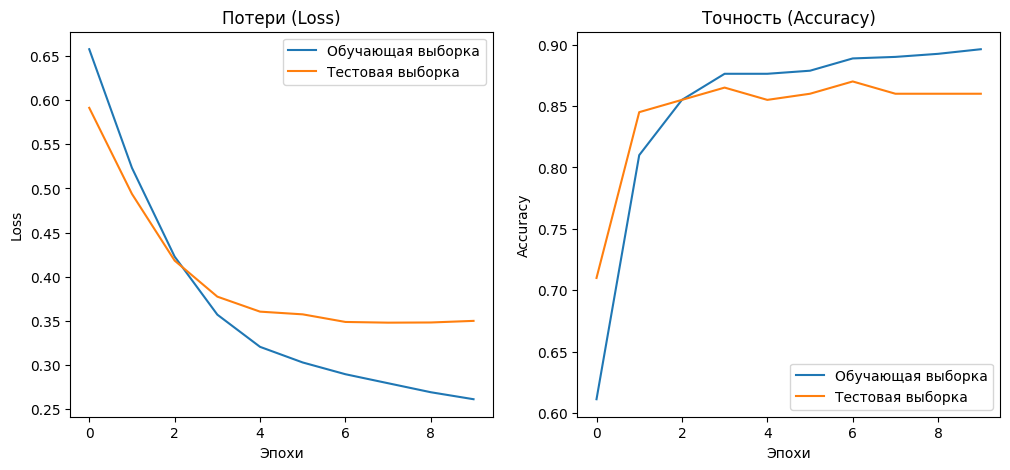

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Тестовая выборка')
plt.title('Потери (Loss)')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Тестовая выборка')
plt.title('Точность (Accuracy)')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend()

plt.show()